In [69]:
"https://www.kaggle.com/code/lokendrasinghteit/time-series-analysis-theories-codes-and-concepts"

'https://www.kaggle.com/code/lokendrasinghteit/time-series-analysis-theories-codes-and-concepts'

In [70]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import pandas as pd


In [105]:
# reading csv file
df=pd.read_csv('monthly-beer-production-in-austr.csv')

In [106]:
df.head() # Going through data top

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [107]:
df.tail() # Going through data bottom

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [108]:
df.isna().count() #no null values

Month                      476
Monthly beer production    476
dtype: int64

In [109]:
#reshaping Month coloumn from str-->Date format
df['Month']=pd.to_datetime(df['Month'])
# setting Month col. as index"
df.set_index('Month',inplace=True)

In [110]:
#Index is set ,no null values, Data in format"
df.head()


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [111]:
# Getting statistical insights
df.describe()


,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


<Axes: xlabel='Month'>

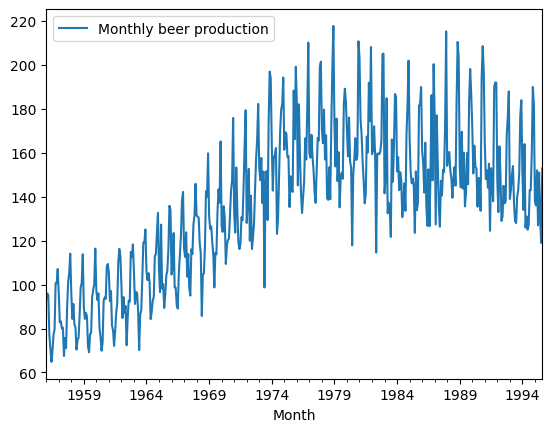

In [112]:
# looking if data is stationary or not, ask is stationary, if trends/patterns --> non-stationary
# so make non-stationary means split tends/patterns till random values(errors) are left
df.plot()

In [114]:
#aliases are there according to needs
ts=df['Monthly beer production'].resample('2QE').sum()

In [115]:
ts.head()

Month
1956-03-31    284.4
1956-09-30    439.7
1957-03-31    570.4
1957-09-30    464.0
1958-03-31    592.3
Freq: 2QE-DEC, Name: Monthly beer production, dtype: float64

<Axes: xlabel='Month'>

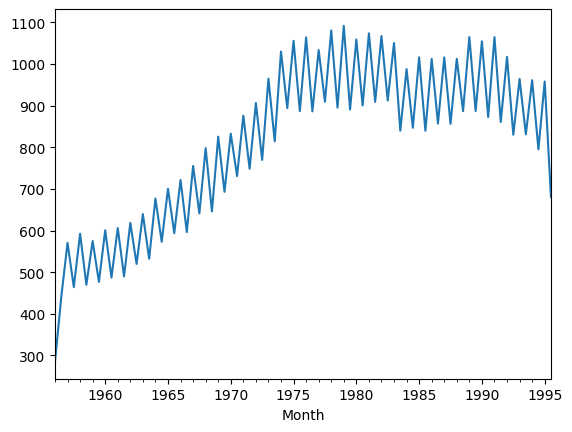

In [116]:
ts.plot()

In [85]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 495.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.9 MB 871.5 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.9 MB 893.0 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.9 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.9 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.9 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.9 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.9 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.9 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.9 MB 2.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/9.9 MB 1.9 MB/s eta 0:00:05
   ---- ------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
# method to check stationary or non-stationary
from statsmodels.tsa.stattools import adfuller

In [118]:
test_result=adfuller(df['Monthly beer production']) # initialising adfuller method

In [119]:

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(beer_sales):
    result=adfuller(beer_sales)
    p = ['p-value']
    for value,p in zip(result,p):
        print(p+' : '+str(value) )
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("non-stationary ")
    

In [120]:
adfuller_test(df['Monthly beer production'])

p-value : -2.282661418787573
non-stationary 


In [121]:

df['Seasonal Sales Difference'] = df['Monthly beer production'] - df['Monthly beer production'].shift(12)
# df['Sales'].shift(1)

In [122]:
df.head(15)

,Monthly beer production,Seasonal Sales Difference
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,NaN
1956-03-01,95.2,NaN
1956-04-01,77.1,NaN
1956-05-01,70.9,NaN
1956-06-01,64.8,NaN
1956-07-01,70.1,NaN
1956-08-01,77.3,NaN
1956-09-01,79.5,NaN


In [123]:
adfuller_test(df['Seasonal Sales Difference'].dropna())

p-value : -2.896762477752009
Stationary


<Axes: xlabel='Month'>

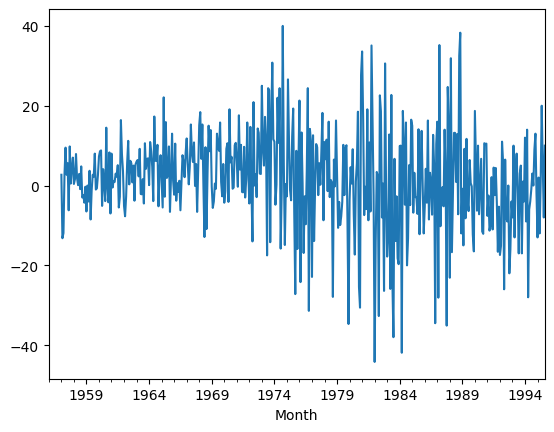

In [124]:
df['Seasonal Sales Difference'].plot()

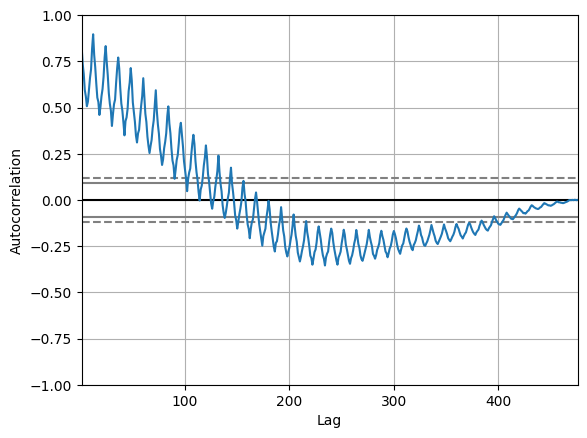

In [130]:

from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
autocorrelation_plot(df['Monthly beer production'])
plt.show()

In [142]:

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

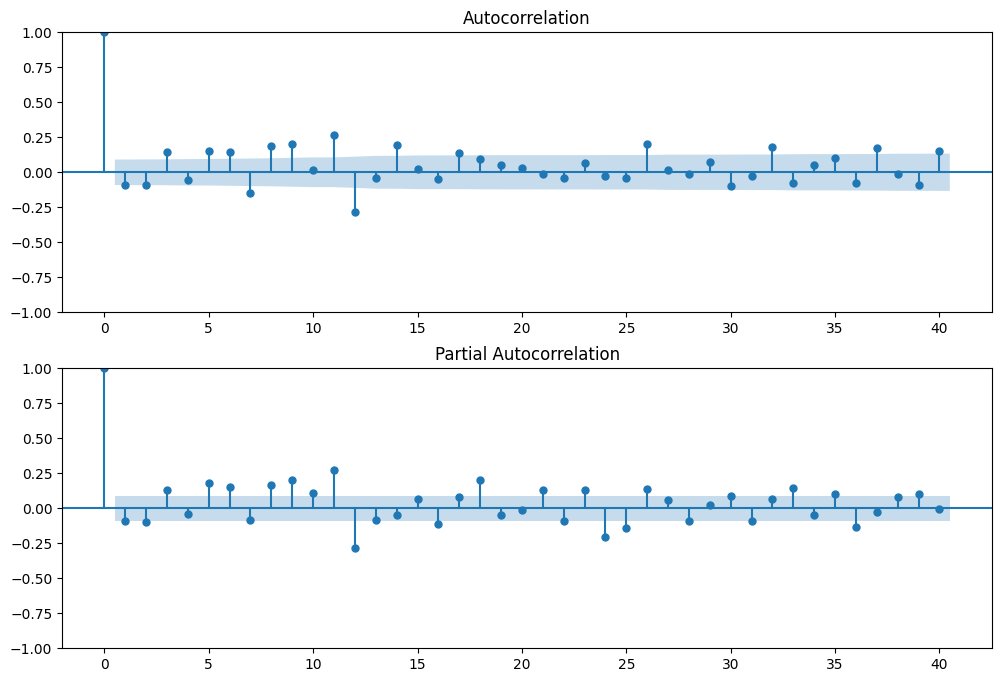

In [138]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal Sales Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal Sales Difference'].iloc[13:],lags=40,ax=ax2)

In [144]:

model=sm.tsa.arima.ARIMA(df['Monthly beer production'],order=(1,1,1))
model_fit=model.fit()

c:\Users\sriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [145]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Monthly beer production   No. Observations:                  476
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -2029.186
Date:                     Mon, 30 Dec 2024   AIC                           4064.372
Time:                             17:44:18   BIC                           4076.862
Sample:                         01-01-1956   HQIC                          4069.284
                              - 08-01-1995                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4806      0.044     10.808      0.000       0.393       0.568
ma.L1         -0.9481      0.018    -52.232      0.000      -0.984      -0.912
sigma2       299.8396     18.615     16.107      0.000     263.354     336.325
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.77   Prob(JB):                         0.12
Heteroskedasticity (H):               2.98   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

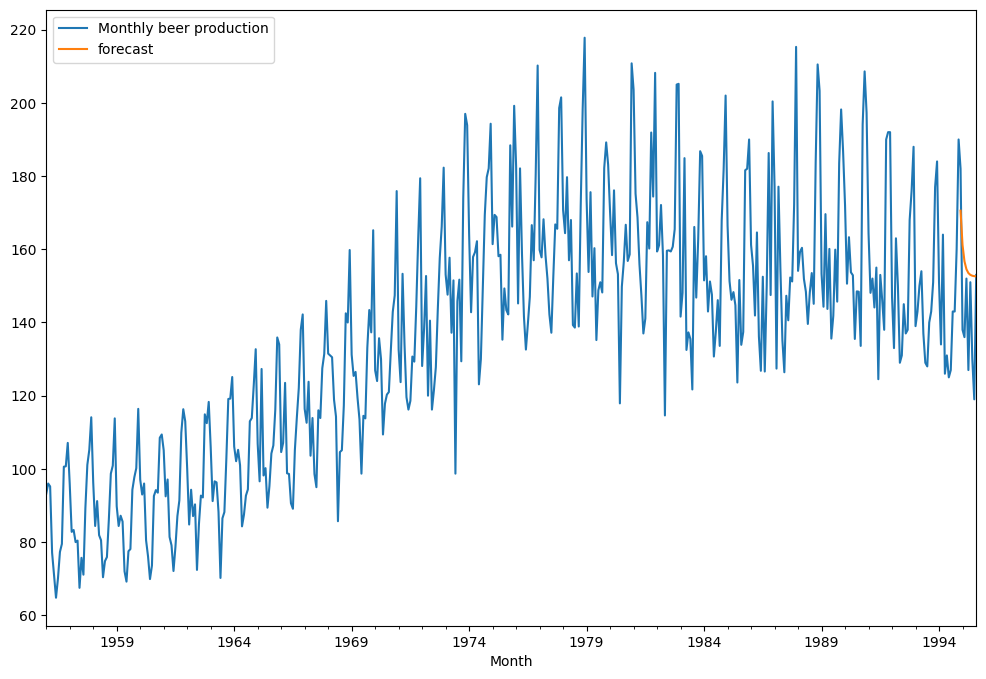

In [254]:
df['forecast']=model_fit.predict(start=467,end=500,dynamic=True)
df[['Monthly beer production','forecast']].plot(figsize=(12,8))

In [150]:
model=sm.tsa.statespace.SARIMAX(df['Monthly beer production'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\sriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [152]:
df

,Monthly beer production,Seasonal Sales Difference,forecast
Month,,,
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,NaN,NaN
1956-03-01,95.2,NaN,NaN
1956-04-01,77.1,NaN,NaN
1956-05-01,70.9,NaN,NaN
...,...,...,...
1995-04-01,127.0,1.0,NaN
1995-05-01,151.0,20.0,NaN
1995-06-01,130.0,5.0,NaN


<Axes: xlabel='Month'>

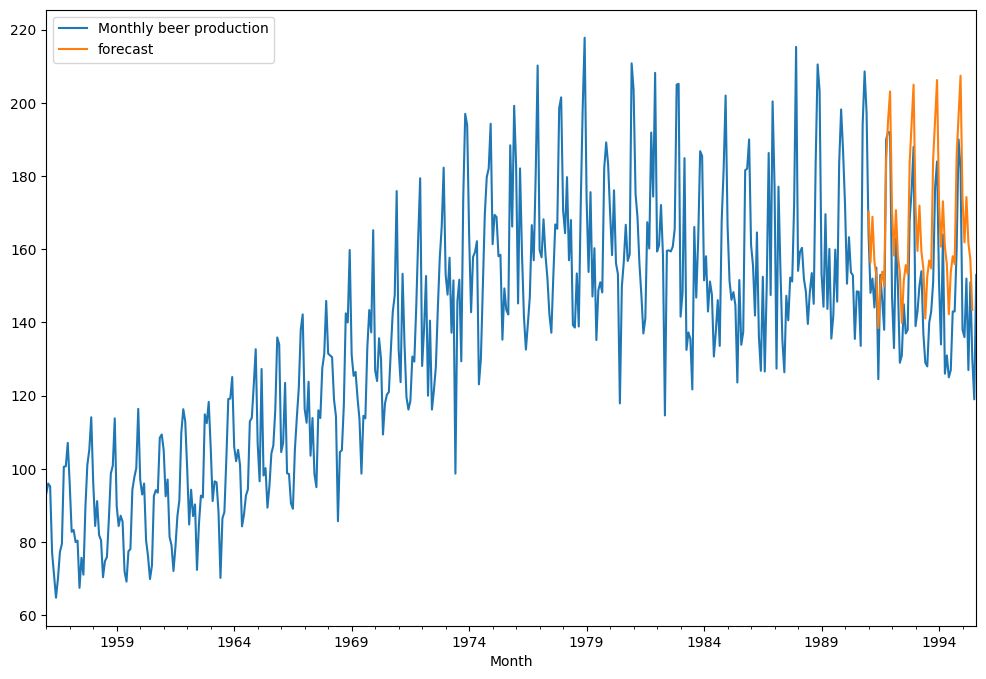

In [271]:

df['forecast']=results.predict(start=420,end=473,dynamic=True)
df[['Monthly beer production','forecast']].plot(figsize=(12,8))

In [155]:

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [156]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [157]:

future_datest_df.tail()

,Monthly beer production,Seasonal Sales Difference,forecast
1997-03-01,NaN,NaN,NaN
1997-04-01,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN


In [158]:
future_df=pd.concat([df,future_datest_df])

C:\Users\sriva\AppData\Local\Temp\ipykernel_28220\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

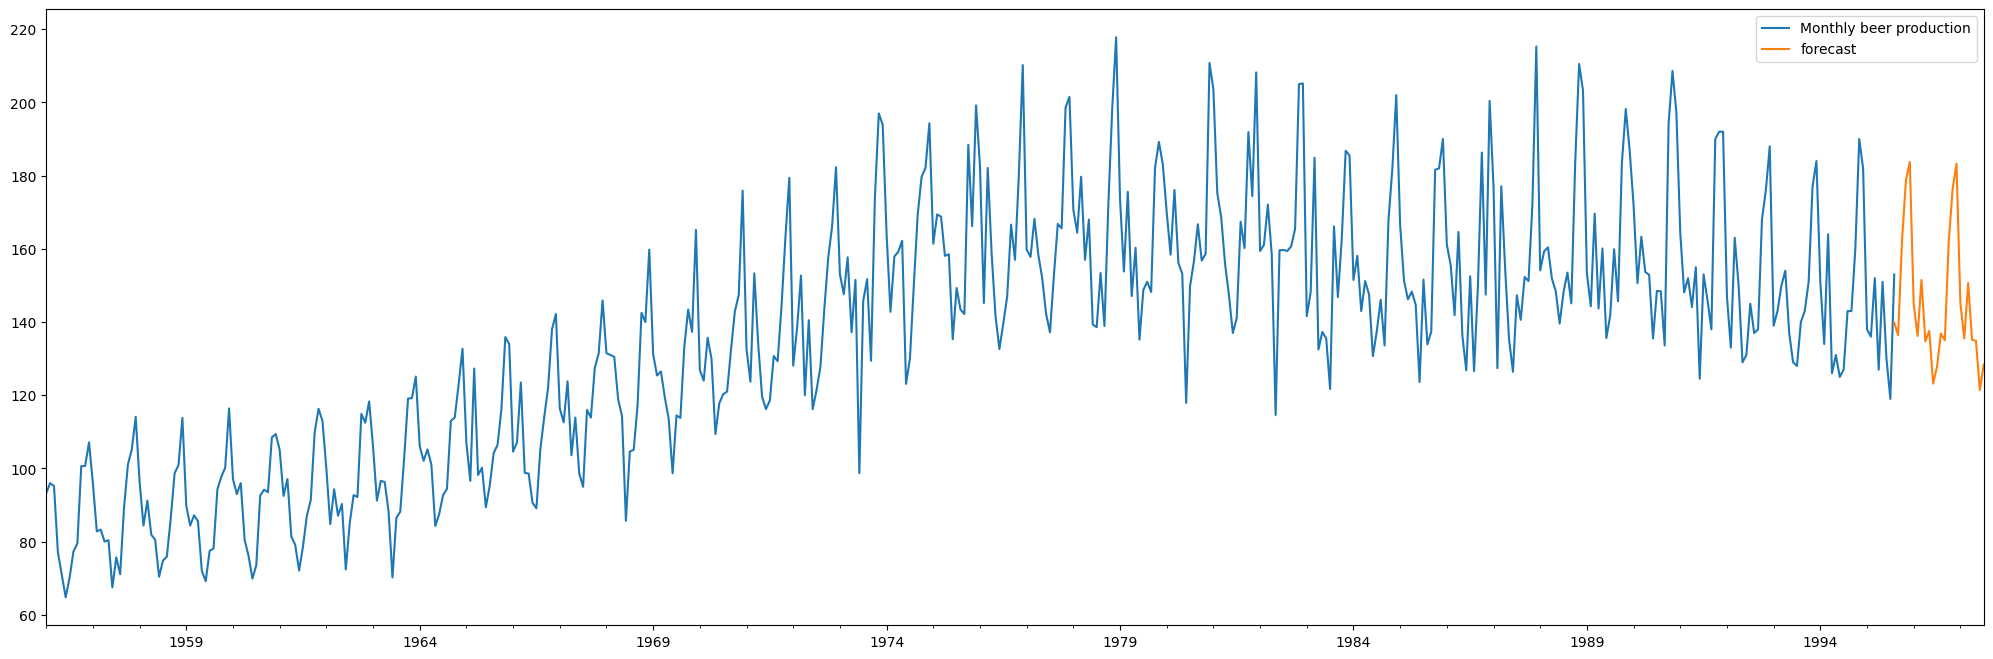

In [273]:
future_df['forecast'] = results.predict(start = 475, end = 750, dynamic= True)  
future_df[['Monthly beer production', 'forecast']].plot(figsize=(25, 8)) 

# Prophet


In [169]:
!pip install prophet

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 660.6 kB/s eta 0:00:21
    --------------------------------------- 0.2/13.3 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.4/13.3 MB 2.7 MB/s eta 0:00:05
   - -------------------------------------- 0.6/13.3 MB 3.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/13.3 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/13.3 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/13.3 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/13.3 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/13.3 MB 3.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.9/13.3 MB 3.5 MB/s eta 0:00:04
   ------ -----------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [174]:
%pip install prophet


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
import prophet as fbprophet
from prophet.plot import plot_plotly, plot_components_plotly


In [303]:
p_df = pd.read_csv('monthly-beer-production-in-austr.csv')
p_df.dropna(inplace= True)
p_df.reset_index(drop=True, inplace=True)


In [304]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [305]:
p_df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [306]:
p_df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [307]:
p_df.columns = ['ds','y']

In [308]:
p_df

,ds,y
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [298]:
p_df['ds']=pd.to_datetime(p_df['ds'])
p_df.tail()

,ds,y
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0
475,1995-08-01,153.0


In [299]:
p_df.set_index('ds',inplace=True)

<Axes: >

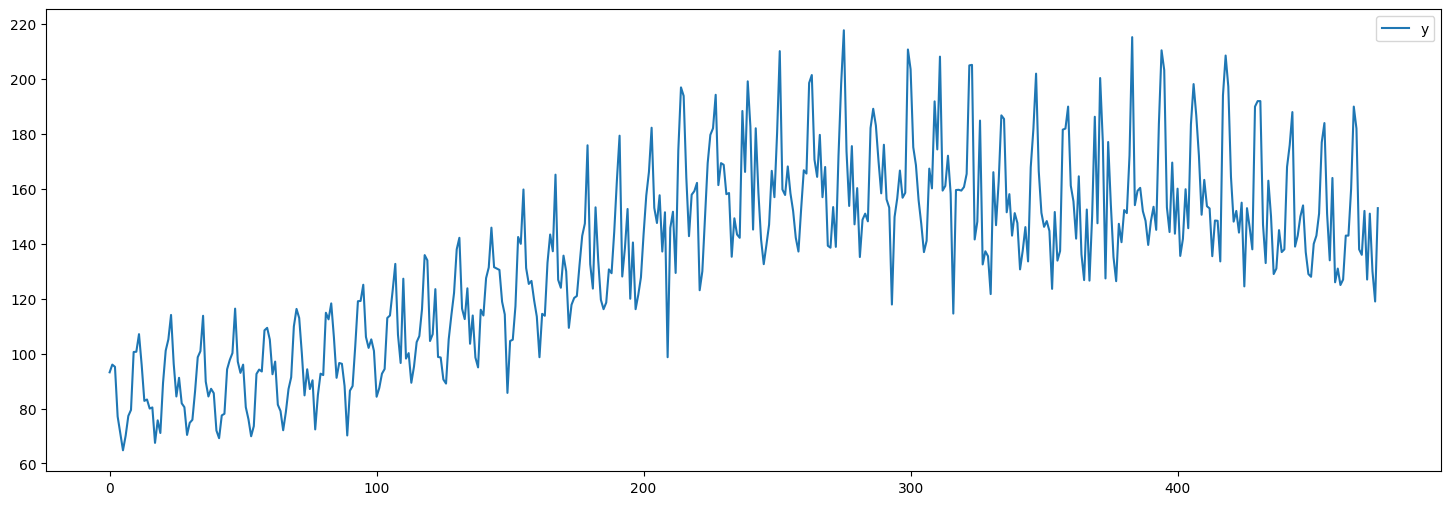

In [309]:
p_df.plot(figsize=(18,6))

In [288]:
len(p_df)

476

In [310]:
train = p_df.iloc[:102]
test = p_df.iloc[102:]

In [314]:
m = fbprophet.Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=100,freq='MS')
forecast = m.predict(future)

19:50:58 - cmdstanpy - INFO - Chain [1] start processing
19:50:59 - cmdstanpy - INFO - Chain [1] done processing


In [315]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1956-01-01,86.214667,86.162213,95.488575,86.214667,86.214667,4.711818,4.711818,4.711818,4.711818,4.711818,4.711818,0.0,0.0,0.0,90.926485
1,1956-02-01,86.289910,82.315213,91.760240,86.289910,86.289910,0.932025,0.932025,0.932025,0.932025,0.932025,0.932025,0.0,0.0,0.0,87.221935
2,1956-03-01,86.360299,86.534005,96.045560,86.360299,86.360299,4.809742,4.809742,4.809742,4.809742,4.809742,4.809742,0.0,0.0,0.0,91.170040
3,1956-04-01,86.435542,73.727332,82.771475,86.435542,86.435542,-8.193034,-8.193034,-8.193034,-8.193034,-8.193034,-8.193034,0.0,0.0,0.0,78.242508
4,1956-05-01,86.508358,67.851450,77.216215,86.508358,86.508358,-14.090126,-14.090126,-14.090126,-14.090126,-14.090126,-14.090126,0.0,0.0,0.0,72.418232


In [316]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
197,1972-06-01,127.739005,102.296999,114.655942,124.424928,131.437854,-19.338405,-19.338405,-19.338405,-19.338405,-19.338405,-19.338405,0.0,0.0,0.0,108.400600
198,1972-07-01,127.994711,106.079971,118.228974,124.600254,131.753581,-15.615296,-15.615296,-15.615296,-15.615296,-15.615296,-15.615296,0.0,0.0,0.0,112.379415
199,1972-08-01,128.258940,115.782624,128.315936,124.793114,132.080307,-6.291174,-6.291174,-6.291174,-6.291174,-6.291174,-6.291174,0.0,0.0,0.0,121.967767
200,1972-09-01,128.523170,120.981608,132.743513,125.010507,132.434400,-2.000588,-2.000588,-2.000588,-2.000588,-2.000588,-2.000588,0.0,0.0,0.0,126.522581
201,1972-10-01,128.778876,134.013937,145.753471,125.230545,132.778181,11.025983,11.025983,11.025983,11.025983,11.025983,11.025983,0.0,0.0,0.0,139.804859


In [317]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
197,1972-06-01,108.400600,102.296999,114.655942
198,1972-07-01,112.379415,106.079971,118.228974
199,1972-08-01,121.967767,115.782624,128.315936
200,1972-09-01,126.522581,120.981608,132.743513
201,1972-10-01,139.804859,134.013937,145.753471


In [318]:
test.tail()

,ds,y
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [208]:
!pip install plotly

^C


  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB 640.0 kB/s eta 0:00:30
   ---------------------------------------- 0.1/19.1 MB 1.4 MB/s eta 0:00:14
    --------------------------------------- 0.3/19.1 MB 2.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/19.1 MB 2.5 MB/s eta 0:00:08
   - -------------------------------------- 0.7/19.1 MB 2.7 MB/s eta 0:00:07
   - -------------------------------------- 0.9/19.1 MB 2.9 MB/s eta 0:00:07
   -- ------------------------------------- 1.1/19.1 MB 3.0 MB/s eta 0:00:06
   -- ------------------------------------- 1.2/19.1 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.4/19.1 MB 3.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.6/19.1 MB 3.4 MB/s eta 0:00:06
   --- ----------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [236]:
from plotly import *

In [ ]:

# plot_plotly(m ,forecast)

In [ ]:


# plot_components_plotly(m, forecast)

In [321]:
# Convert Month into Datetime
p_df['ds']=pd.to_datetime(p_df['ds'])

In [323]:
p_df.set_index('ds',inplace=True)

In [324]:

from pandas.tseries.offsets import DateOffset
future_dates=[p_df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [325]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [326]:
future_datest_df.tail()

,Monthly beer production,Seasonal Sales Difference,forecast
1997-03-01,NaN,NaN,NaN
1997-04-01,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN


In [327]:

future_df=pd.concat([p_df,future_datest_df])

<Axes: >

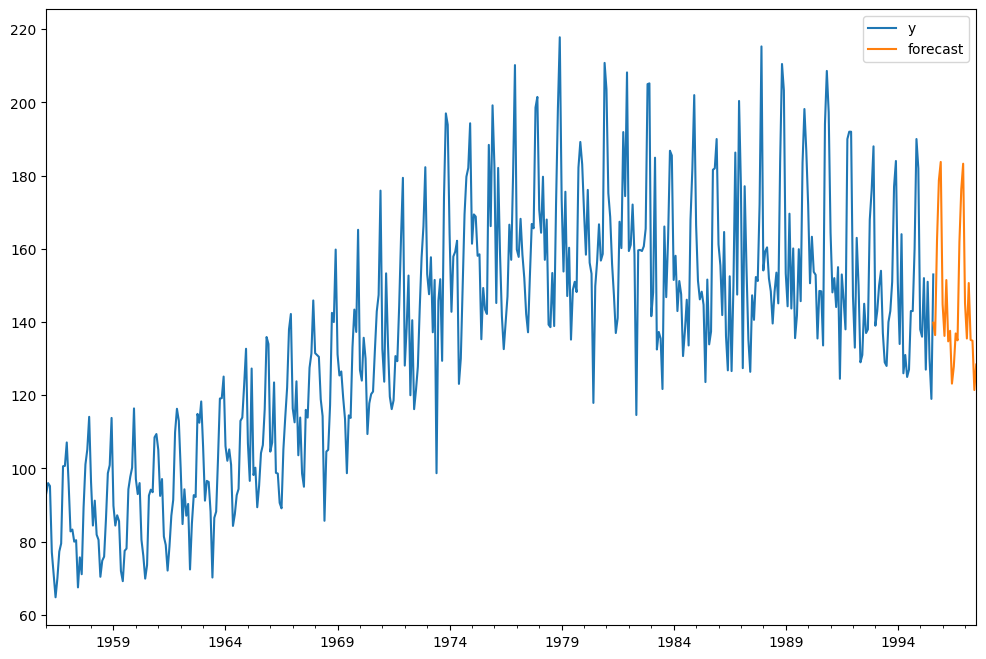

In [333]:

future_df['forecast'] = results.predict(start = 475, end = 800, dynamic= True)  
future_df[['y', 'forecast']].plot(figsize=(12, 8)) 